<a href="https://colab.research.google.com/github/codestates/ds-sc11x/blob/master/ds_sc11x%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC11x

## Data Preprocessing & Exploratory Data Analysis

## Data Preprocessing

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있으며 description은 다음과 같습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### data1

|geo|time|cell_phones_total|
|:-:|:-:|:-:|
|kor|2017|63658688|
|kor|2018|66355778|
|kor|2019|68892541|

- 지역, 연도, 통화수

### data2

|geo|time|population|
|:-:|:-:|:-:|
|kor|2017|51096415|
|kor|2018|51171706|
|kor|2019|51225308|

- 지역, 연도, 인구수

### data3

|geo|country|
|:-:|:-:|
|kor|South Korea|

- 지역, 나라 이름

### 1. Load and Explore the Data

- 데이터셋을 데이터프레임으로 불러오세요.
- 결측데이터를 확인하세요.
- `time` vs `cell_phones_total`에 대해서 `scatter plot`을 그리세요.


In [1]:
#데이터셋을 데이터프레임으로 불러오기
import pandas as pd
df1 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv')
df2 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv')
df3 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv')

#df1에 대하여 결측데이터 확인
df1.isna().sum()

Unnamed: 0           0
geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [2]:
#df2에 대하여 결측데이터 확인
df2.isna().sum()

Unnamed: 0    0
geo           0
time          0
population    0
dtype: int64

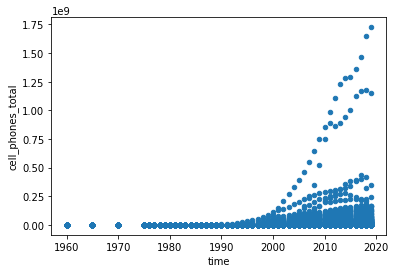

In [3]:
#scatter plot 그리기
df1.plot.scatter(x='time', y='cell_phones_total')

### 2. Join data

다음 데이터를 만드세요. (shape = 9568 * 5)

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|


In [4]:
df1

,Unnamed: 0,geo,time,cell_phones_total
0,0,abw,1960,0.0
1,1,abw,1965,0.0
2,2,abw,1970,0.0
3,3,abw,1975,0.0
4,4,abw,1976,0.0
...,...,...,...,...
9569,9569,zwe,2015,12757410.0
9570,9570,zwe,2016,12878926.0
9571,9571,zwe,2017,14092104.0
9572,9572,zwe,2018,12908992.0


In [5]:
#data trimming 
df1 = df1.iloc[:,1:]
df2 = df2.iloc[:,1:]
df3 = df3.iloc[:,1:]
df1

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0
...,...,...,...
9569,zwe,2015,12757410.0
9570,zwe,2016,12878926.0
9571,zwe,2017,14092104.0
9572,zwe,2018,12908992.0


In [6]:
df2

,geo,time,population
0,abw,1950,38068
1,abw,1951,38267
2,abw,1952,38964
3,abw,1953,40148
4,abw,1954,41760
...,...,...,...
35329,zwe,2096,30940779
35330,zwe,2097,30952209
35331,zwe,2098,30959811
35332,zwe,2099,30964041


In [7]:
df3

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla
...,...,...
268,yem_south,South Yemen (former)
269,yug,Yugoslavia
270,zaf,South Africa
271,zmb,Zambia


In [8]:
#merge data 
joined_data = df1.merge(df2)
joined_data = joined_data.merge(df3)
joined_data

,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba
...,...,...,...,...,...
9563,zwe,2015,12757410.0,13814629,Zimbabwe
9564,zwe,2016,12878926.0,14030331,Zimbabwe
9565,zwe,2017,14092104.0,14236595,Zimbabwe
9566,zwe,2018,12908992.0,14438802,Zimbabwe


### 3. Feature Engineering

인구당 cell phone의 수를 표기한 `PPP`라는 feature를 추가하세요. 

그 결과로 2019년 한국에서 PPP가 1.3448이 나와야 합니다. (해당 내역을 보여주세요.)

In [9]:
joined_data.dtypes

geo                   object
time                   int64
cell_phones_total    float64
population             int64
country               object
dtype: object

In [10]:
joined_data

,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba
...,...,...,...,...,...
9563,zwe,2015,12757410.0,13814629,Zimbabwe
9564,zwe,2016,12878926.0,14030331,Zimbabwe
9565,zwe,2017,14092104.0,14236595,Zimbabwe
9566,zwe,2018,12908992.0,14438802,Zimbabwe


In [11]:
#Add feature PPP
import math
joined_data['PPP'] = (joined_data['cell_phones_total']/joined_data['population'])
res = joined_data.loc[4805,'PPP']
res = math.trunc(10000 * res) / 10000;
res


1.3448

### 4. Data Manipulation

각 나라별로 평균 PPP를 계산하세요.

In [12]:
#각 나라별 평균 PPP
grouped = joined_data['PPP'].groupby(joined_data['country'])
mean_PPP = pd.DataFrame(grouped.mean())
mean_PPP

,PPP
country,
Afghanistan,0.133398
Albania,0.324242
Algeria,0.299324
American Samoa,0.012152
Andorra,0.347083
...,...
Vietnam,0.349318
Virgin Islands (U.S.),0.127248
Yemen,0.136329


가장 많은 PPP 값을 갖는 top 10 (geo) 를 구하세요.

다음과 비슷한 결과가 나와야 합니다. 

|geo|PPP|
|:-:|:-:|
|are|0.741916|
|sau|0.757034|
|lie|0.806225|
|hkg|0.810664|
|mac|0.818130|
|isr|0.840197|
|srb|0.951586|
|nld_curacao|1.259227|
|mne|1.574349|
|sxm|1.899506|


In [13]:
#top 10 in the descendin order
top_PPP = mean_PPP.nlargest(10, 'PPP')
top_PPP.iloc[::-1]

,PPP
country,
United Arab Emirates,0.741916
Saudi Arabia,0.757034
Liechtenstein,0.806225
"Hong Kong, China",0.810664
"Macao, China",0.818130
Israel,0.840197
Serbia,0.951586
Curaçao,1.259227
Montenegro,1.574349


## EDA
이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.


아래의 코드는 이미 여러분들을 위해 준비되어 있습니다. 아래 cell 을 실행하면 자동으로 data 가 load 되며, `df`라는 이름의 dataframe 을 얻게 될 겁니다. 

(원하신다면 추가 EDA를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


아래의 그림을 따라 그리세요 :

<img src='https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png' width = 500>



여러분들이 새로 만들게 될 plot은 다음을 만족해야 합니다:
- `example`과 유사한 `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 각각 **다른** 색깔을 가져야 합니다. (위 `example` 과 반드시 같은 색일 필요는 없습니다)
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


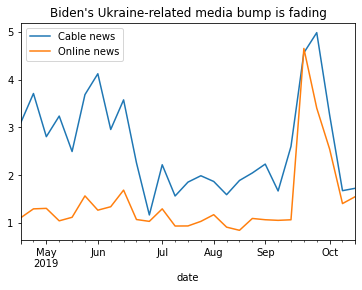

In [15]:
import matplotlib.pyplot as plt
#plt.close("all")

df = df.rename(columns={"biden_cable_multiple": "Cable news", "biden_online_multiple": "Online news"})
df = df.drop(df.index[:16])
df.plot(title = "Biden's Ukraine-related media bump is fading")


## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들중 하나를 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

## 1. Data Preprocessing

- `cell_phones`dataframe 에서 필터를 걸어 USA 와 china 정보만 담게 하고, scatter plot 을 다시 그려 보세요. 

- geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요. 

- 2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다. 
미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?

## 2. EDA

- 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요. 


In [16]:
joined_data['geo'] = joined_data['geo'].str.upper()
joined_data

,geo,time,cell_phones_total,population,country,PPP
0,ABW,1960,0.0,54211,Aruba,0.000000
1,ABW,1965,0.0,57360,Aruba,0.000000
2,ABW,1970,0.0,59063,Aruba,0.000000
3,ABW,1975,0.0,60657,Aruba,0.000000
4,ABW,1976,0.0,60586,Aruba,0.000000
...,...,...,...,...,...,...
9563,ZWE,2015,12757410.0,13814629,Zimbabwe,0.923471
9564,ZWE,2016,12878926.0,14030331,Zimbabwe,0.917935
9565,ZWE,2017,14092104.0,14236595,Zimbabwe,0.989851
9566,ZWE,2018,12908992.0,14438802,Zimbabwe,0.894049


In [17]:
result_df1  = joined_data.loc[joined_data['country'] == 'United States'] 
result_df2 = joined_data.loc[joined_data['country'] == 'China']

#result_df2['PPP'] = result_df2['PPP'].round(5)

result_df = pd.concat([result_df1, result_df2])
result_df['cell_phones_total'] =  result_df['cell_phones_total'].apply(np.int64)

result_df

,geo,time,cell_phones_total,population,country,PPP
8994,USA,1960,0,186720571,United States,0.000000
8995,USA,1965,0,199733676,United States,0.000000
8996,USA,1970,0,209513341,United States,0.000000
8997,USA,1975,0,219081251,United States,0.000000
8998,USA,1976,0,221086429,United States,0.000000
...,...,...,...,...,...,...
1670,CHN,2015,1291984200,1406847870,China,0.918354
1671,CHN,2016,1364934000,1414049351,China,0.965266
1672,CHN,2017,1469882500,1421021791,China,1.034384
1673,CHN,2018,1649301700,1427647786,China,1.155258


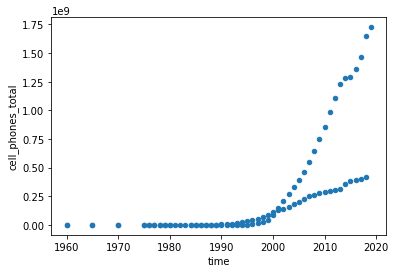

In [18]:
result_df.plot.scatter(x = 'time', y = 'cell_phones_total')


In [19]:
#temp1 = result_df1['cell_phones_total'']
#temp2 = result_df2['population']
result_df1 = result_df1.drop(columns = ['geo','PPP','country'])
result_df1 = result_df1.reset_index( drop = True)
result_df1 = result_df1.set_index('time')
result_df1


,cell_phones_total,population
time,,
1960,0.0,186720571
1965,0.0,199733676
1970,0.0,209513341
1975,0.0,219081251
1976,0.0,221086429
1977,0.0,223135663
1978,0.0,225223303
1979,0.0,227339318
1980,0.0,229476354


In [20]:
result_df1 = result_df1.rename(columns={"cell_phones_total": "number of cellphones in total", "population": "American population"})

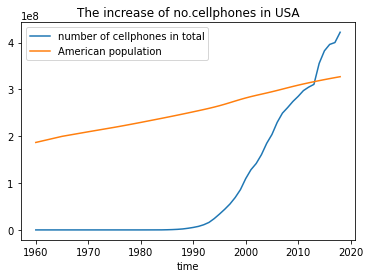

In [21]:
result_df1.plot(title = "The increase of no.cellphones in USA")


In [26]:
#미국에서 cellphone의 개수가 인구수를 앞지르는 년도는? (I got an answer for graphical method)
ans = 2014